<a href="https://colab.research.google.com/github/Shokih7/Unsupervised/blob/main/Final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup


## Import

In [ ]:
###Basic
import pandas as pd
import numpy as np
###Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.manifold import MDS
import scipy.cluster.hierarchy as sch

###Visuale
import seaborn as sns
import matplotlib.pyplot as plt

###Nicer
import warnings
warnings.filterwarnings('ignore')

##Install

In [ ]:
!pip install kmodes
from kmodes.kmodes import KModes

!pip install fuzzy-c-means
from fcmeans import FCM

!pip install gower
!pip install hmmlearn
from hmmlearn import hmm
import gower


scaler = StandardScaler()


##Data

In [ ]:
# importing the dataset from the google sheets document.

sheet_url = "https://docs.google.com/spreadsheets/d/1CRS-mgp2RASq4pzmz9rpcXhszWjBMmaX2Ntdk2_RZCc/edit?usp=sharing"
sheet_id = sheet_url.split('/d/')[1].split('/edit')[0]
sheet_name = "Dataset"  # Replace with your actual sheet name

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)
# print(df.head())

In [ ]:
#Fill Nan
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df.fillna({col: df[col].mean()}, inplace=True)
    else:
        df.fillna({col: df[col].mode()[0]}, inplace=True)


##Grouping

In [ ]:
features_for_clustering = ['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD'] #continuis

all_features            = ['Age', 'Primary streaming service', 'Hours per day',
                           'While working', 'Instrumentalist', 'Composer', 'Fav genre',
                           'Exploratory', 'Foreign languages', 'BPM', 'Classical F Indicator',
                           'Country F Indicator', 'EDM F Indicator', 'Folk F Indicator',
                           'Gospel F Indicator', 'Hip hop F Indicator', 'Jazz F Indicator',
                           'K pop F Indicator', 'Latin F Indicator', 'Lofi F Indicator',
                           'Metal F Indicator', 'Pop F Indicator', 'R&B F Indicator',
                           'Rap F Indicator', 'Rock F Indicator', 'Video game music F Indicator'
                           'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']

cat_features            = ['Primary streaming service', 'While working', 'Instrumentalist',
                           'Composer', 'Composer Indicator','Fav genre', 'Exploratory',
                           'Foreign languages','Frequency [Classical]','Frequency [Country]',
                           'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
                           'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
                           'Frequency [Latin]', 'Frequency [Lofi]','Frequency [Metal]',
                           'Frequency [Pop]',  'Frequency [R&B]', 'Frequency [Rap]',
                           'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects']

genre                   = ['Fav genre', 'Foreign languages','Frequency [Classical]',
                           'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
                           'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
                           'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
                           'Frequency [Metal]', 'Frequency [Pop]',  'Frequency [R&B]',
                           'Frequency [Rap]','Frequency [Rock]', 'Frequency [Video game music]']

genre_indicators        = ['Classical F Indicator', 'Country F Indicator', 'EDM F Indicator',
                           'Folk F Indicator', 'Gospel F Indicator', 'Hip hop F Indicator',
                           'Jazz F Indicator',  'K pop F Indicator', 'Latin F Indicator',
                           'Lofi F Indicator', 'Metal F Indicator', 'Pop F Indicator',
                           'R&B F Indicator',  'Rap F Indicator', 'Rock F Indicator',
                           'Video game music F Indicator']

mental_features         = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

habits_features         = ['Age', 'Hours per day', 'While working Indicator', 'BPM']

cat_habits              = ['Primary streaming service', 'While working', 'Instrumentalist',
                           'Composer', 'Fav genre', 'Exploratory',
                           'Foreign languages','Music effects']

genre_indicators        = ['Classical F Indicator', 'Country F Indicator', 'EDM F Indicator',
                           'Folk F Indicator', 'Gospel F Indicator', 'Hip hop F Indicator',
                           'Jazz F Indicator', 'K pop F Indicator', 'Latin F Indicator',
                           'Lofi F Indicator', 'Metal F Indicator', 'Pop F Indicator',
                           'R&B F Indicator', 'Rap F Indicator', 'Rock F Indicator',
                           'Video game music F Indicator']



In [ ]:
X_con_habits = df[habits_features]
X_con_mental = df[mental_features]
X_con_all = df[features_for_clustering]
X_con_habits_scaled = scaler.fit_transform(X_con_habits)
X_con_mental_scaled = scaler.fit_transform(X_con_mental)
X_con_all_scaled = scaler.fit_transform(X_con_all)

In [ ]:
print(df.columns)

Index(['ID', 'Timestamp', 'Age', 'Primary streaming service',
       'Primary streaming service Indicator', 'Hours per day', 'While working',
       'While working Indicator', 'Instrumentalist',
       'Instrumentalist Indicator', 'Composer', 'Composer Indicator',
       'Fav genre', 'Fav genre Indicator', 'Exploratory',
       'Exploratory Indicator', 'Foreign languages',
       'Foreign languages Indicator', 'BPM', 'Frequency [Classical]',
       'Classical F Indicator', 'Frequency [Country]', 'Country F Indicator',
       'Frequency [EDM]', 'EDM F Indicator', 'Frequency [Folk]',
       'Folk F Indicator', 'Frequency [Gospel]', 'Gospel F Indicator',
       'Frequency [Hip hop]', 'Hip hop F Indicator', 'Frequency [Jazz]',
       'Jazz F Indicator', 'Frequency [K pop]', 'K pop F Indicator',
       'Frequency [Latin]', 'Latin F Indicator', 'Frequency [Lofi]',
       'Lofi F Indicator', 'Frequency [Metal]', 'Metal F Indicator',
       'Frequency [Pop]', 'Pop F Indicator', 'Frequency [R&B

# Clustering

##Algo

###Spectral

In [ ]:
#habits
gower_dist_matrix = gower.gower_matrix(X_con_habits)

# Similarity = 1 - distance
gower_sim_matrix = 1 - gower_dist_matrix

# Step 3: Apply Spectral Clustering
sc = SpectralClustering(n_clusters=4, affinity='precomputed', random_state=42)
df['spec_cluster_habits'] = sc.fit_predict(gower_sim_matrix)

# Clustering
spectral = SpectralClustering(n_clusters=8, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
df['spec_cluster_mental'] = spectral.fit_predict(X_con_mental_scaled)
df['spec_cluster_all'] = spectral.fit_predict(X_con_all_scaled)

###Prim

In [ ]:
prim_cluster = AgglomerativeClustering(n_clusters=9, metric='euclidean', linkage='ward')
df['prim_habits_cluster'] = prim_cluster.fit_predict(X_con_habits_scaled)
df['prim_mental_cluster'] = prim_cluster.fit_predict(X_con_mental_scaled)
df['prim_all_cluster'] = prim_cluster.fit_predict(X_con_all_scaled)

###GMM

In [ ]:
gmm = GaussianMixture(n_components=7, random_state=42)
df['gmm_cluster_habits'] = gmm.fit_predict(X_con_habits_scaled)
df['gmm_cluster_mental'] = gmm.fit_predict(X_con_mental_scaled)
df['gmm_cluster_all'] = gmm.fit_predict(X_con_all_scaled)

###FCM

In [ ]:
fcm = FCM(n_clusters=7, random_state=42)
fcm.fit(X_con_habits_scaled)
df['fcm_habits'] = fcm.predict(X_con_habits_scaled)

fcm = FCM(n_clusters=7, random_state=42)
fcm.fit(X_con_mental_scaled)
df['fcm_mental'] = fcm.predict(X_con_mental_scaled)

fcm = FCM(n_clusters=7, random_state=42)
fcm.fit(X_con_all_scaled)
df['fcm_all'] = fcm.predict(X_con_all_scaled)

###Kmeans

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_con_habits_scaled)
df['kmeans_habits'] = kmeans.predict(X_con_habits_scaled)
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_con_mental_scaled)
df['kmeans_mental'] = kmeans.predict(X_con_mental_scaled)
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_con_all_scaled)
df['kmeans_all'] = kmeans.predict(X_con_all_scaled)

###Categorial

In [ ]:
# Select categorical features
X_categorical = df[cat_habits]
# Apply K-Modes clustering
kmodes_model = KModes(n_clusters=10, init='Huang', n_init=10, verbose=1) # You can adjust n_clusters
df['spec_kmodes_habits'] = kmodes_model.fit_predict(X_categorical)

# Select categorical features
X_categorical = df[genre]
# Apply K-Modes clustering
kmodes_model = KModes(n_clusters=10, init='Huang', n_init=10, verbose=1) # You can adjust n_clusters
df['spec_kmodes_genre'] = kmodes_model.fit_predict(X_categorical)

# Select categorical features
X_categorical = df[cat_features]
# Apply K-Modes clustering
kmodes_model = KModes(n_clusters=10, init='Huang', n_init=10, verbose=1) # You can adjust n_clusters
df['spec_kmodes_all'] = kmodes_model.fit_predict(X_categorical)



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 78, cost: 1265.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 91, cost: 1316.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 124, cost: 1274.0
Run 3, iteration: 2/100, moves: 57, cost: 1274.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 118, cost: 1283.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 221, cost: 1208.0
Run 5, iteration: 2/100, moves: 33, cost: 1208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 191, cost: 1353.0
Run 6, iteration: 2/100, moves: 1, cost: 1353.0
Init: initializing centroids
Init: initializing clusters
Starting iterations

##Analyze

In [ ]:
class_groups = {'habits': ['spec_cluster_habits', 'prim_habits_cluster', 'gmm_cluster_habits', 'fcm_habits', 'kmeans_habits', 'spec_kmodes_habits'],
                'mental': ['spec_cluster_mental', 'prim_mental_cluster', 'gmm_cluster_mental', 'fcm_mental','kmeans_mental', 'spec_kmodes_genre'],
                'all': ['spec_cluster_all', 'prim_all_cluster', 'gmm_cluster_all', 'fcm_all', 'kmeans_all', 'spec_kmodes_all']
                }

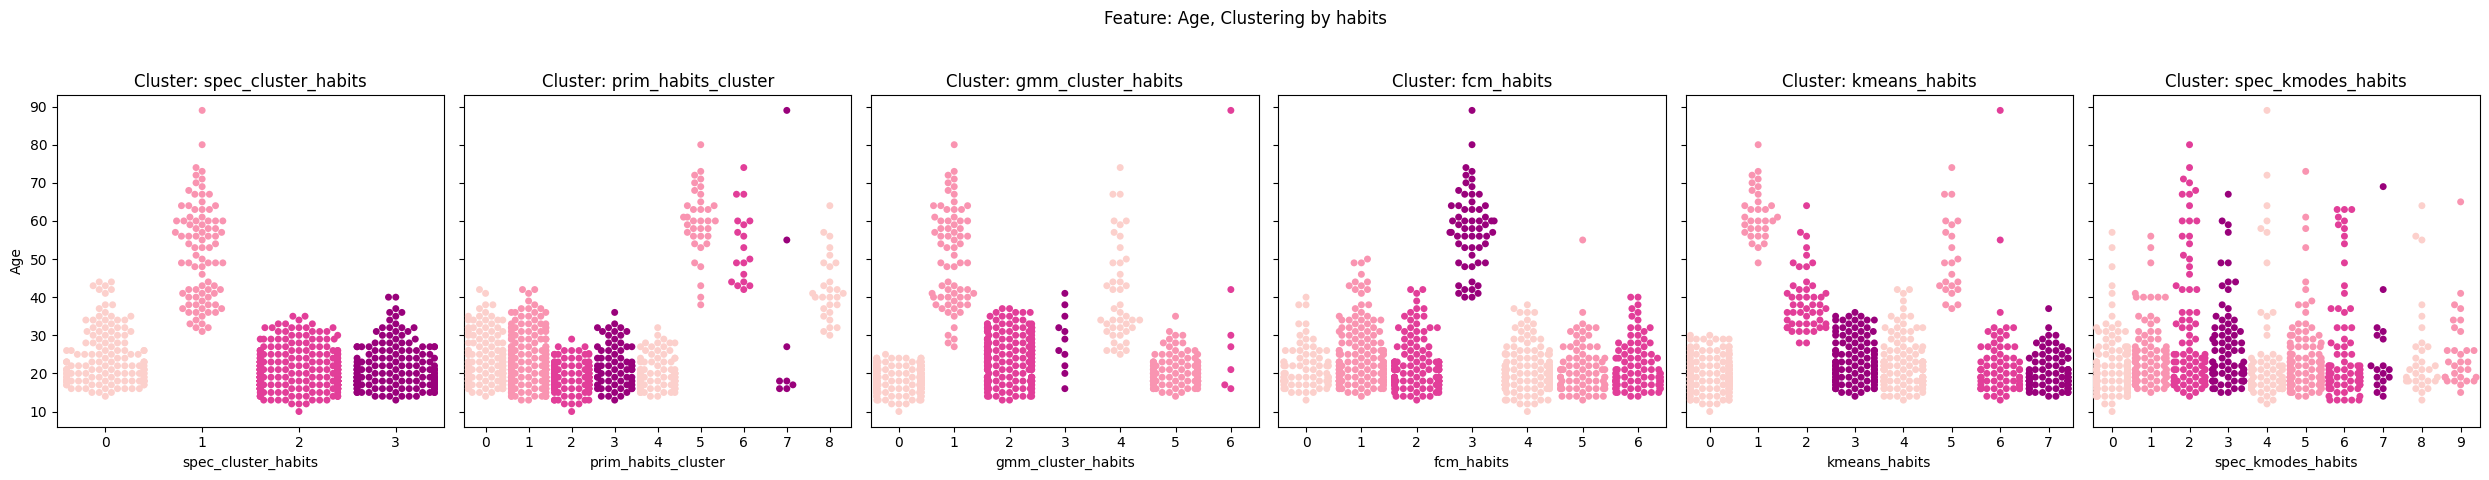

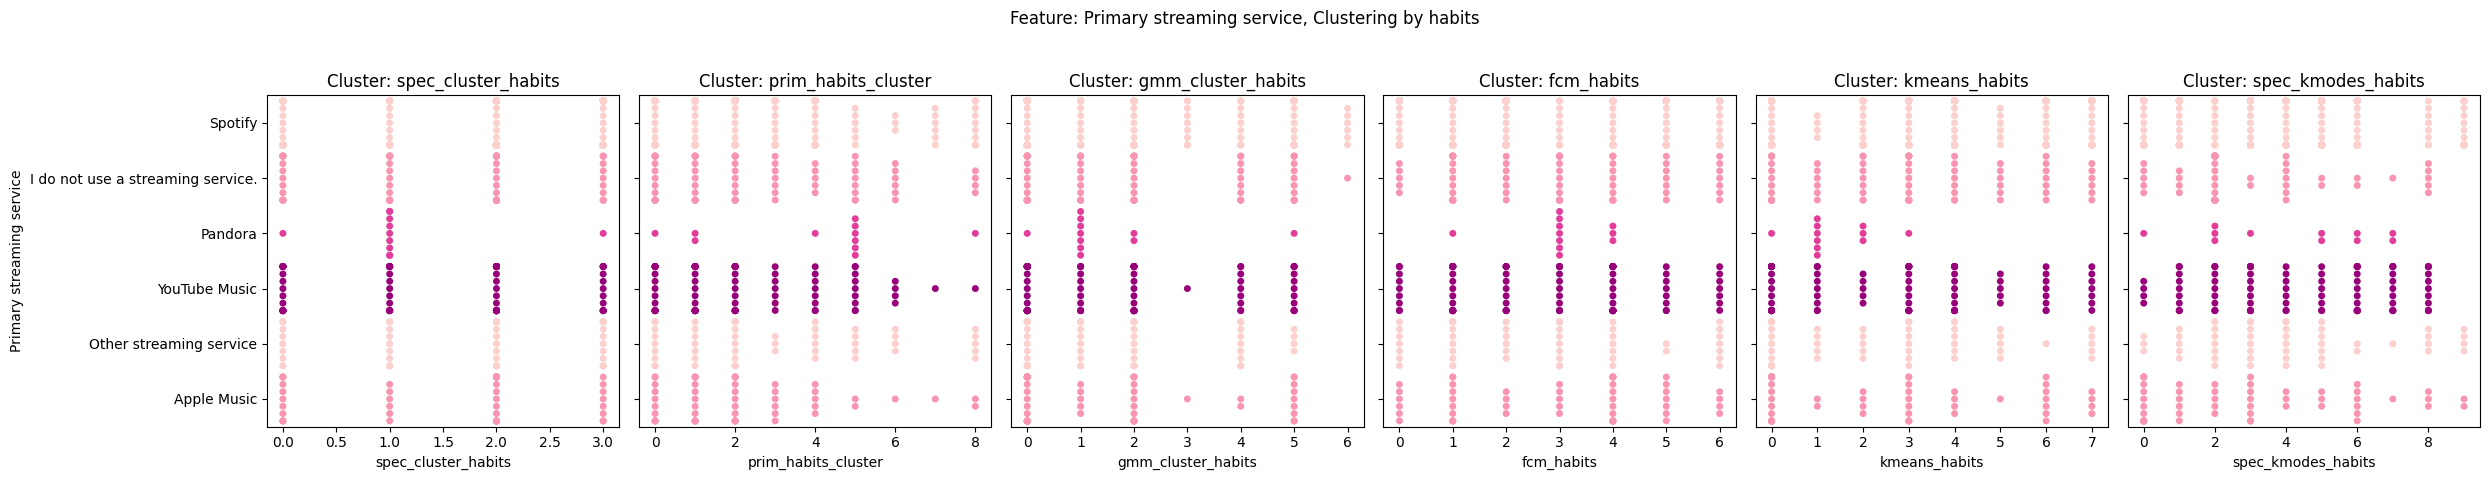

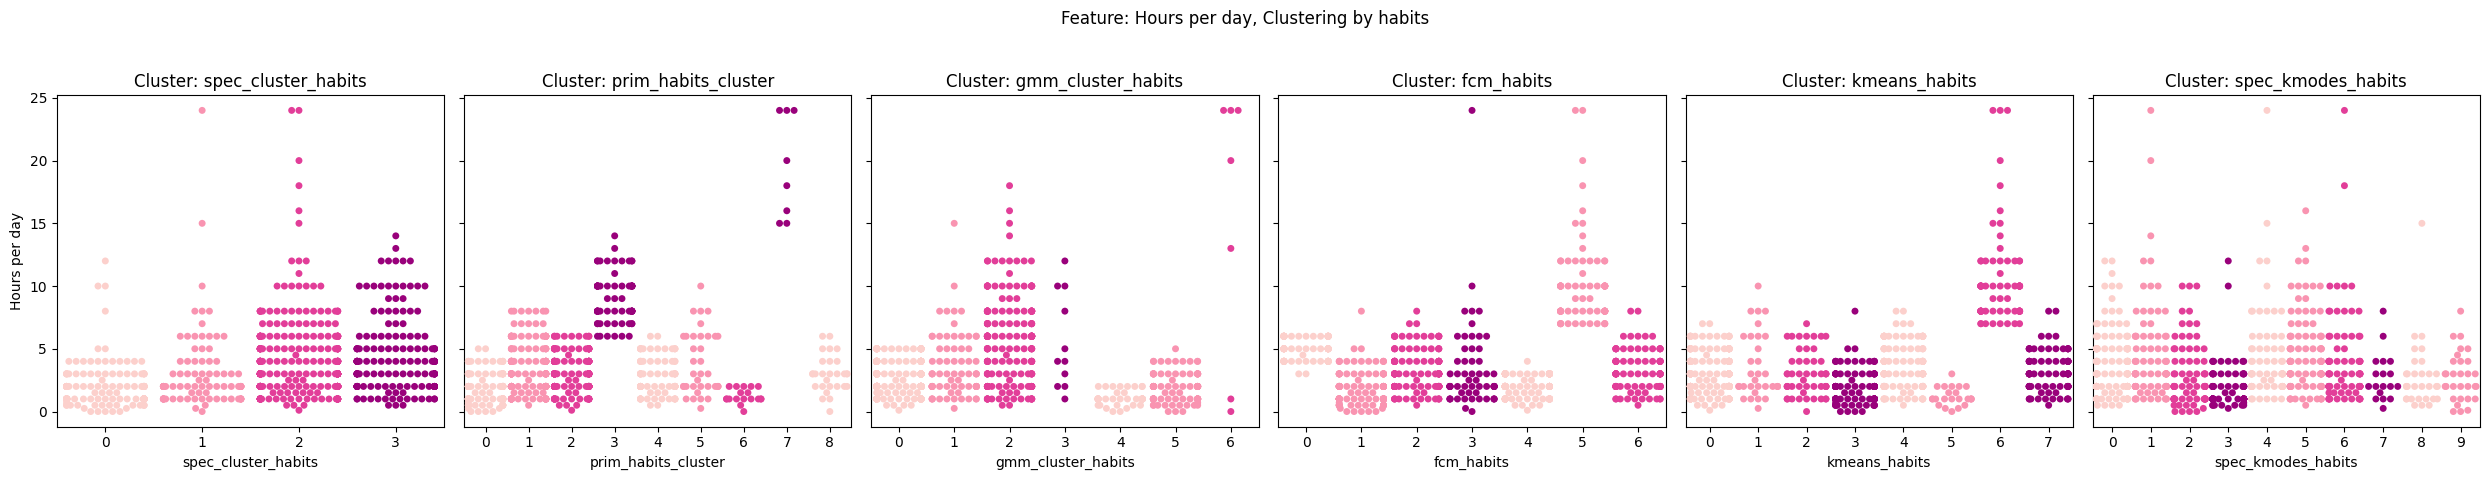

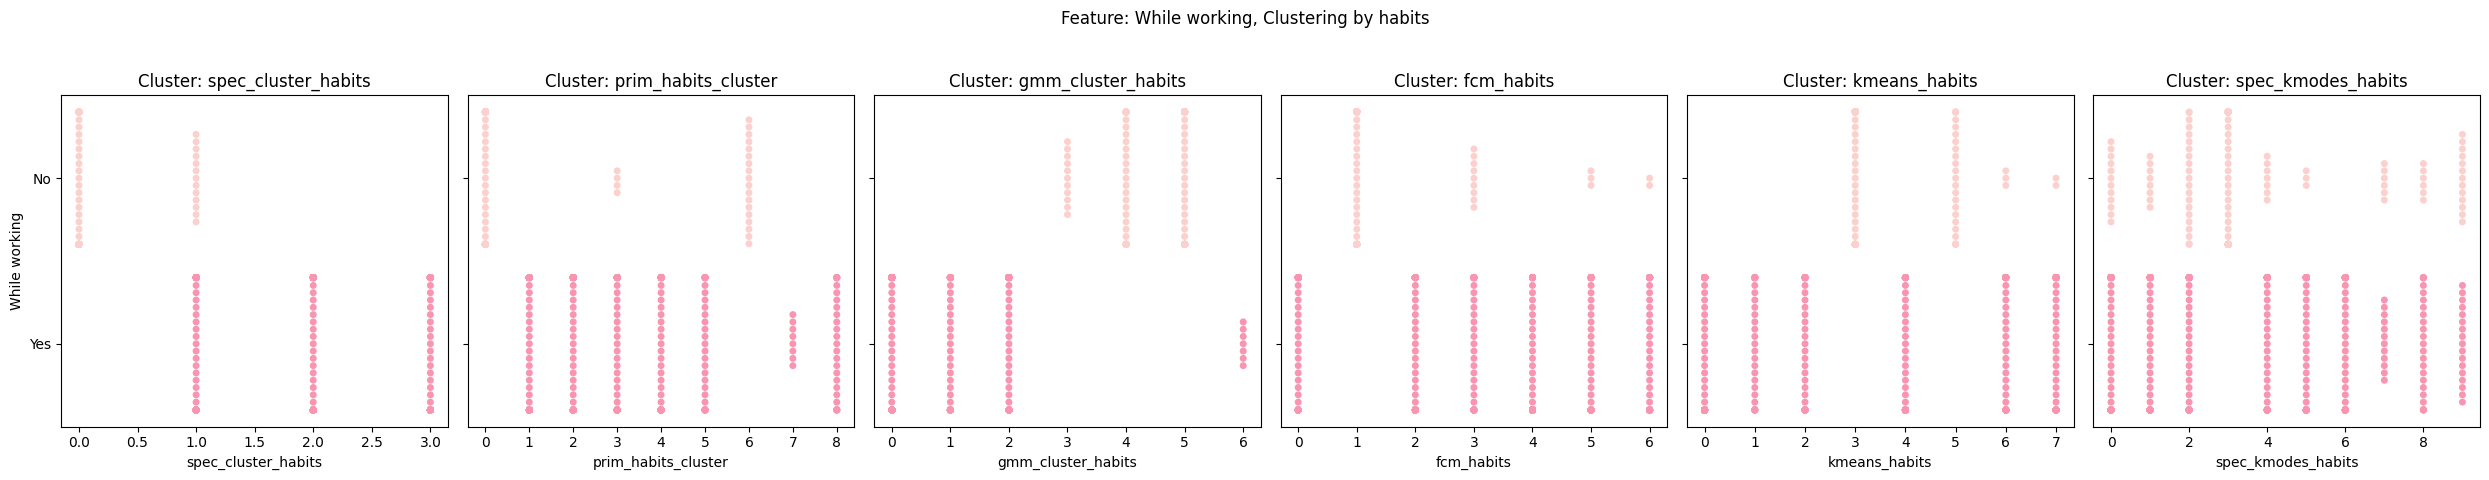

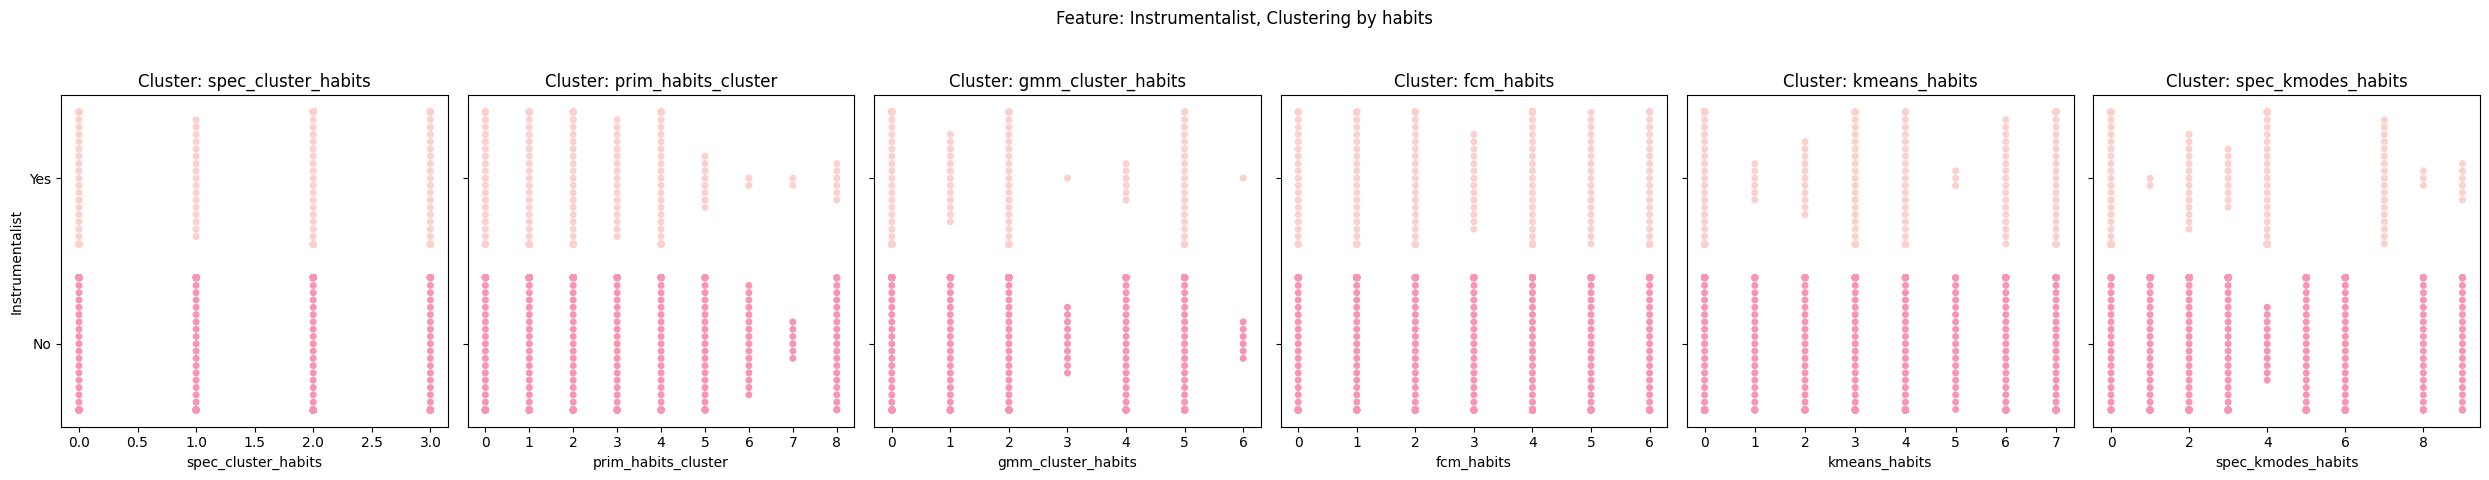

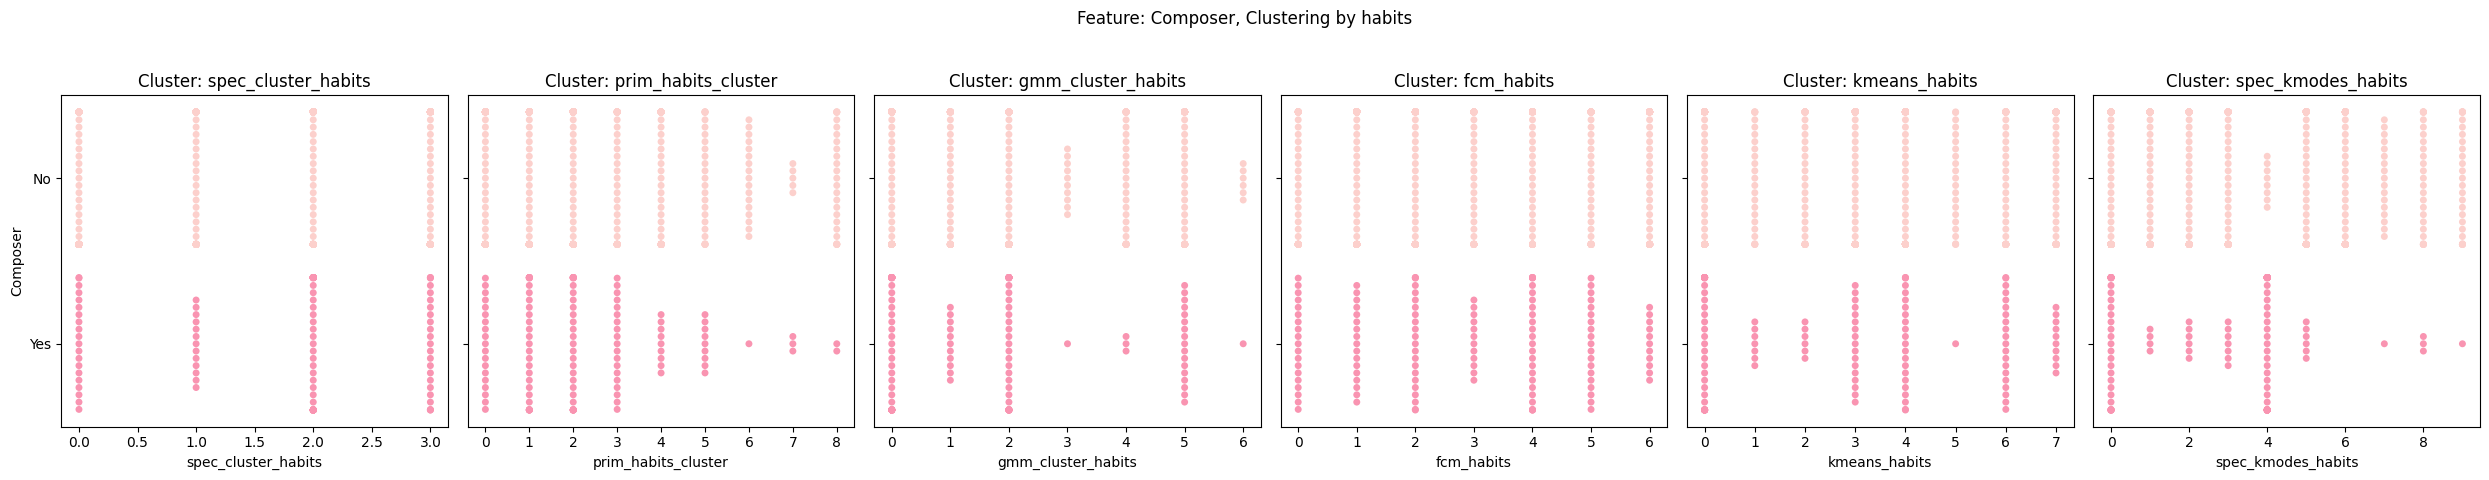

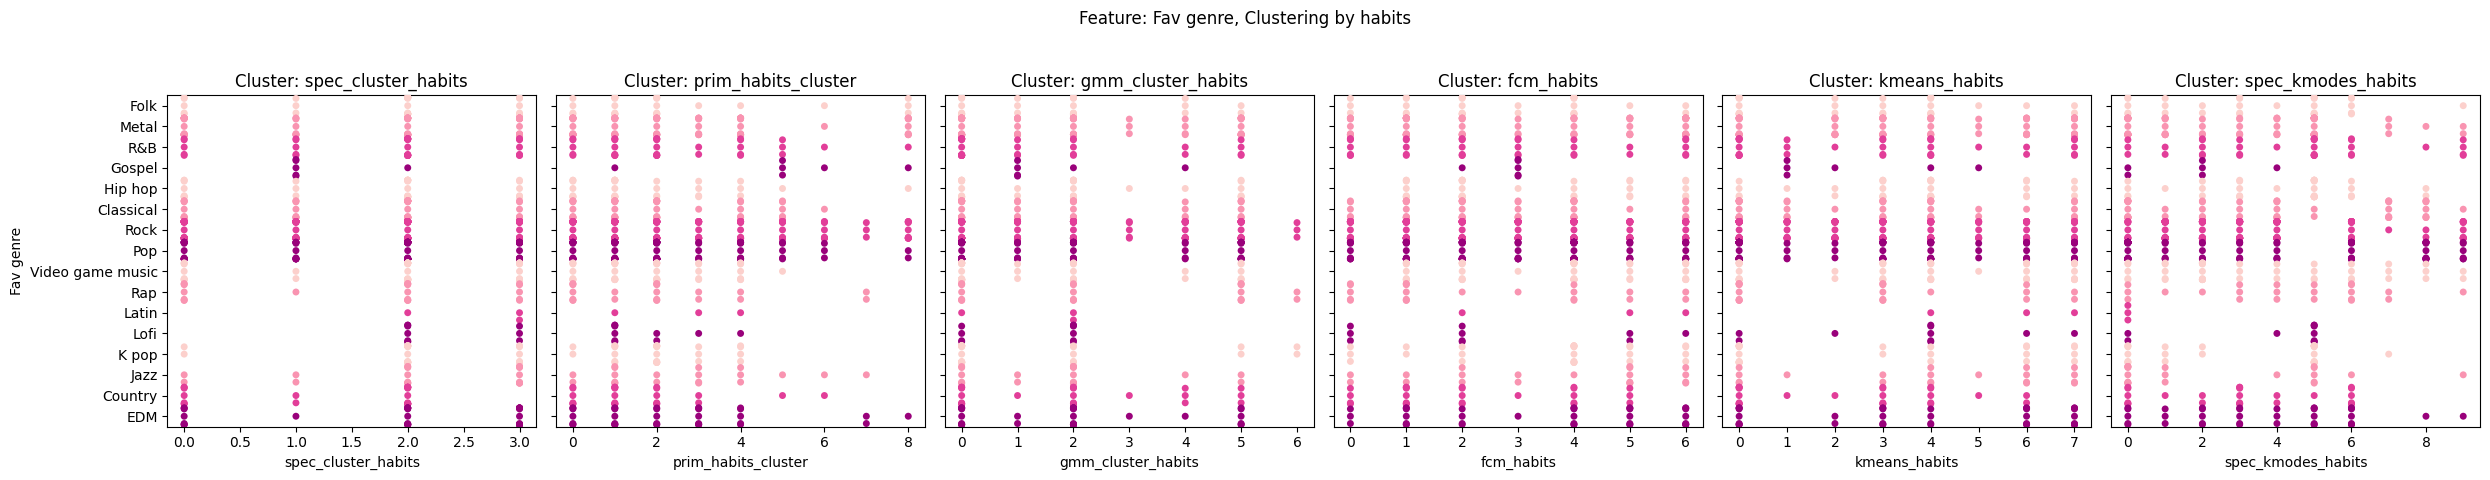

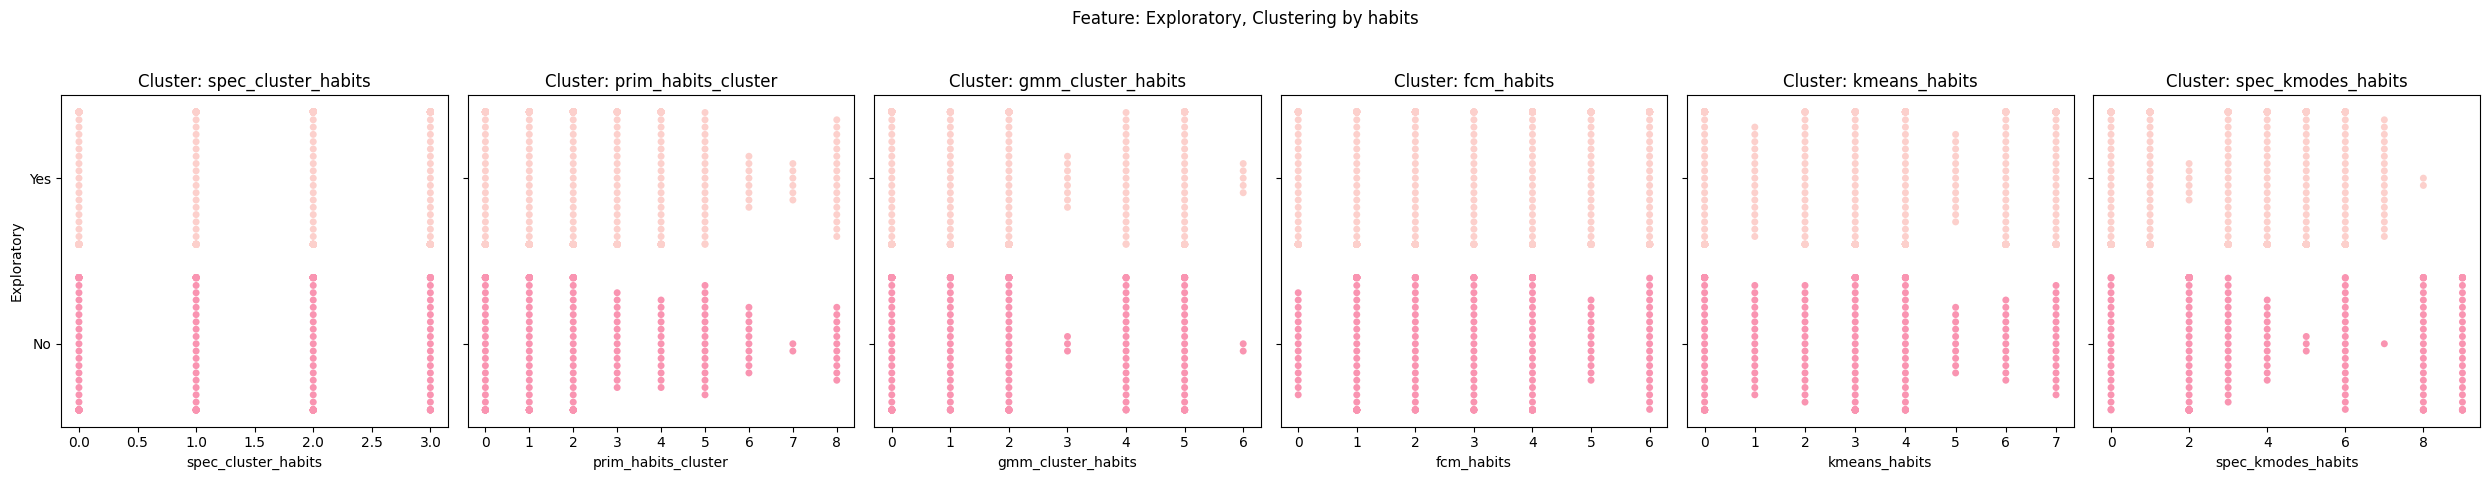

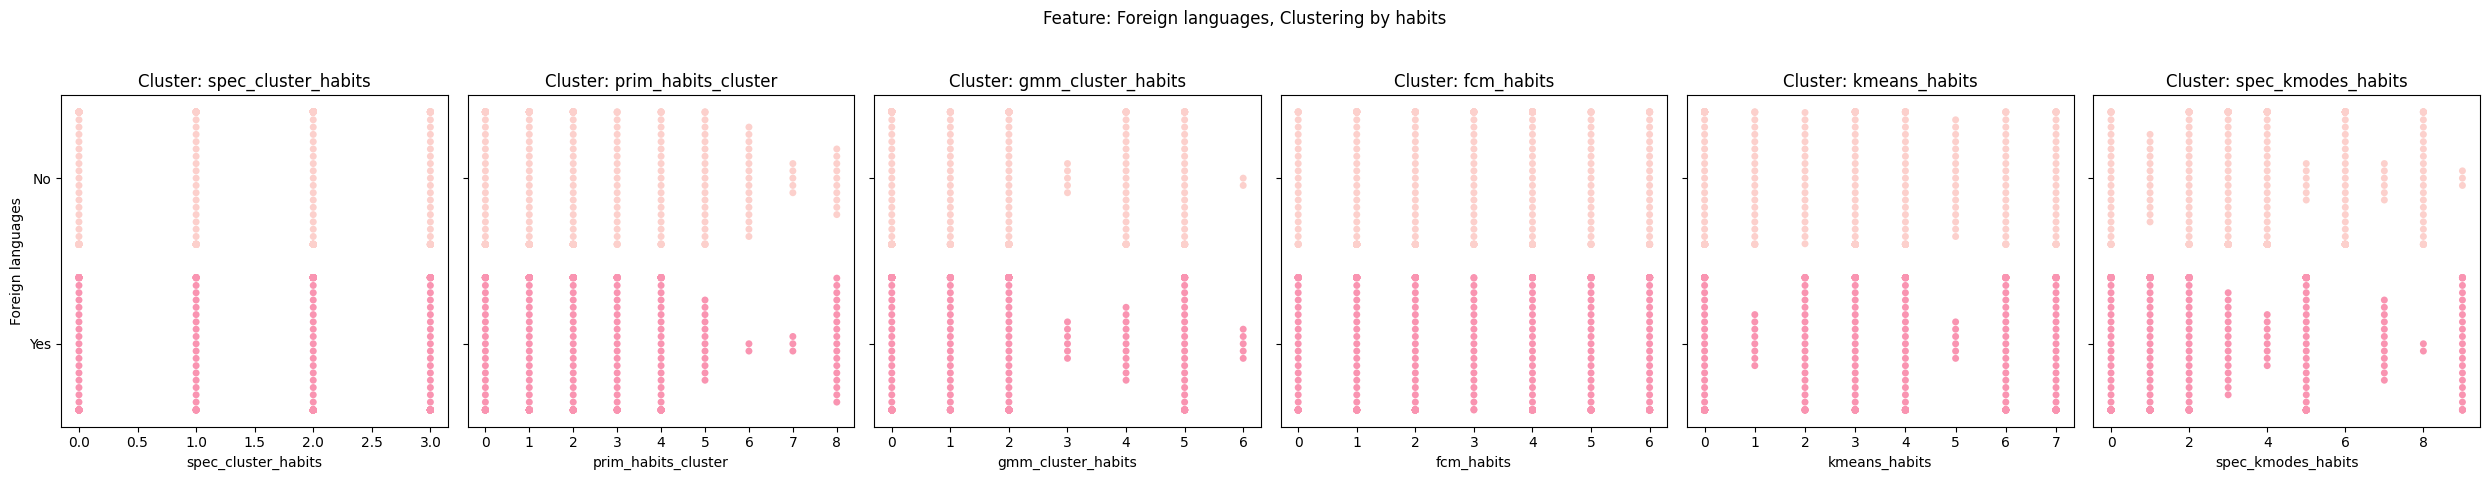

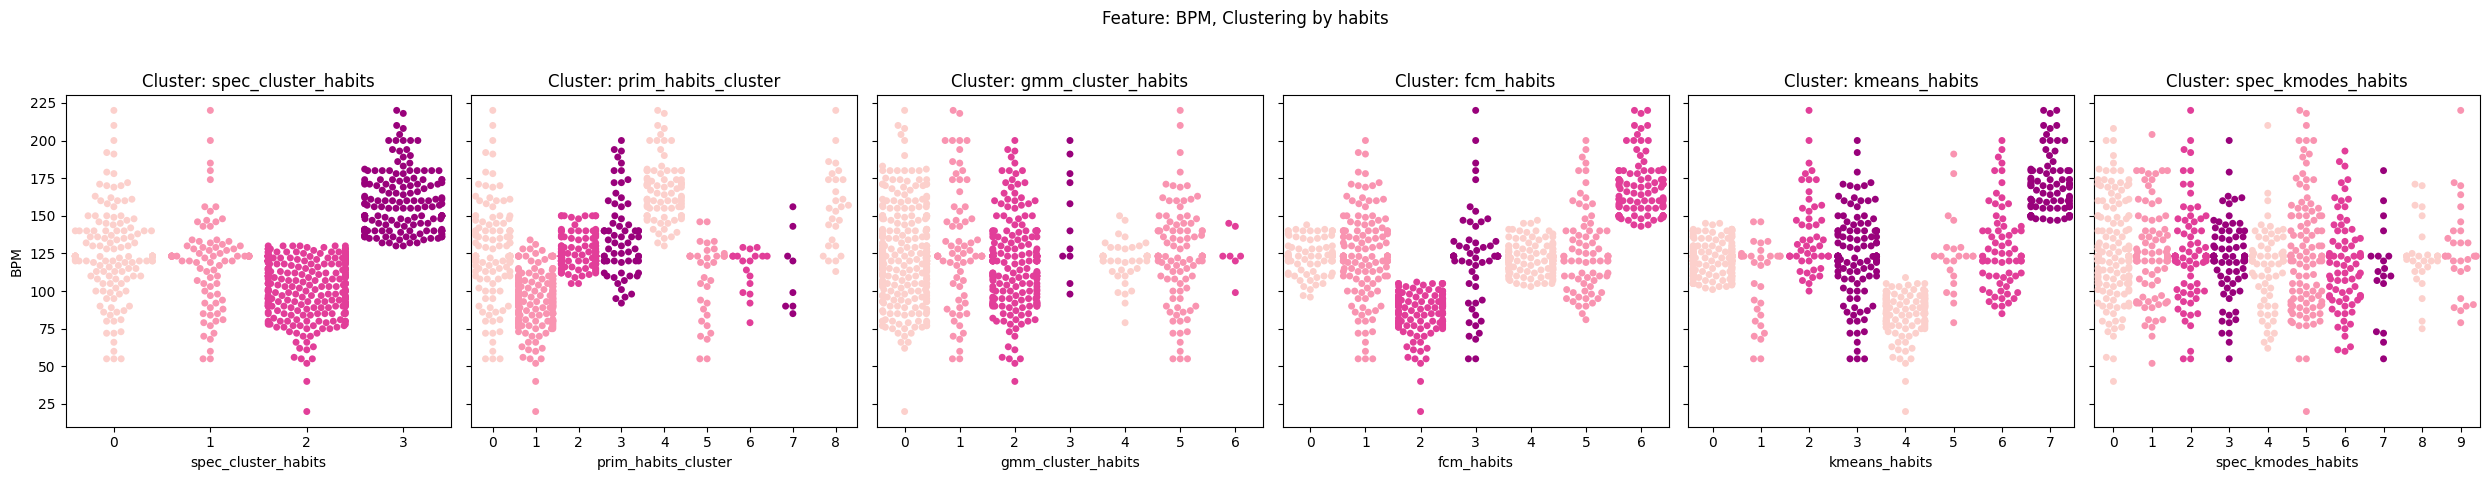

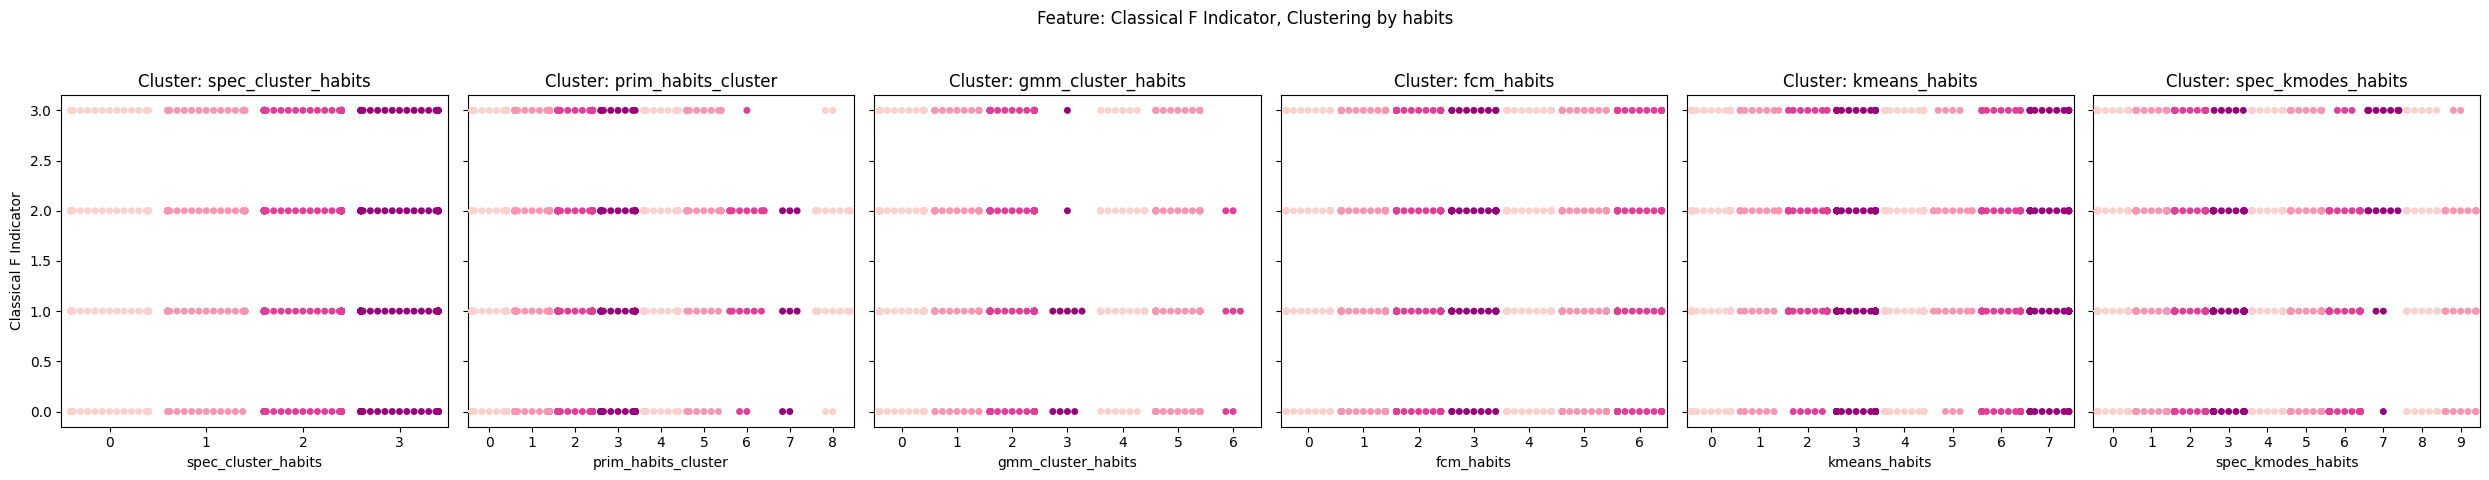

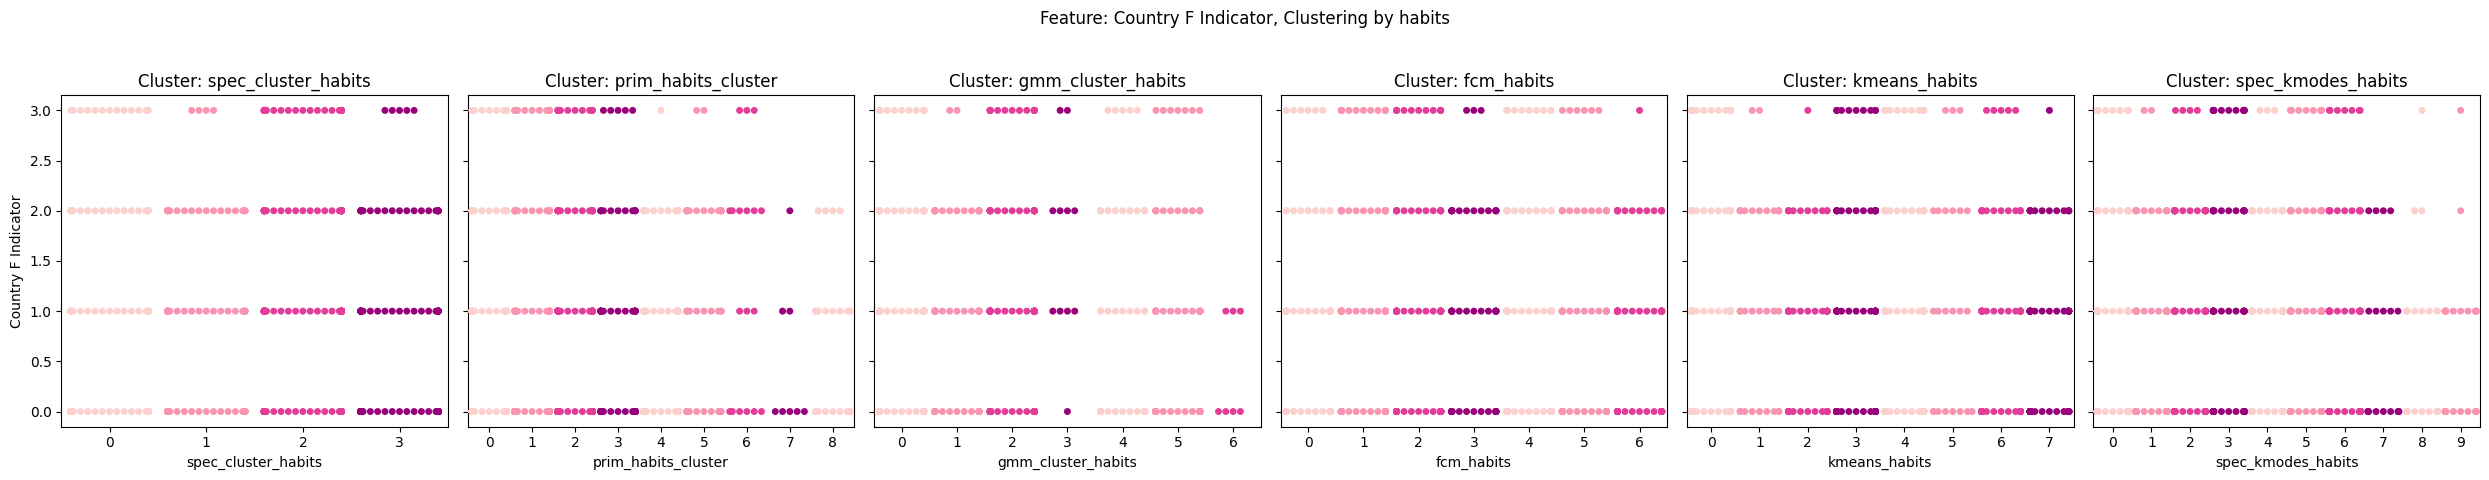

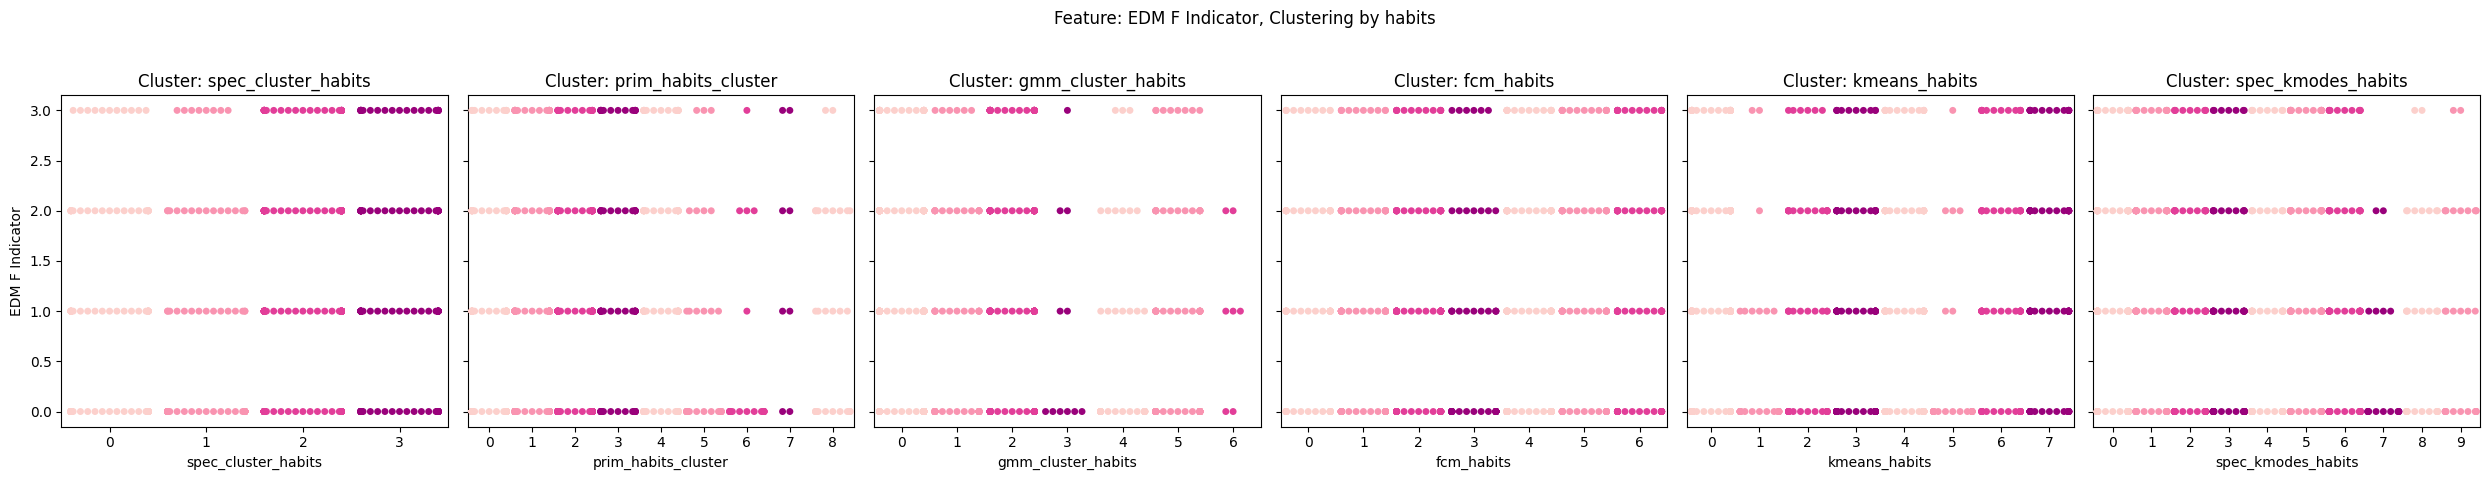

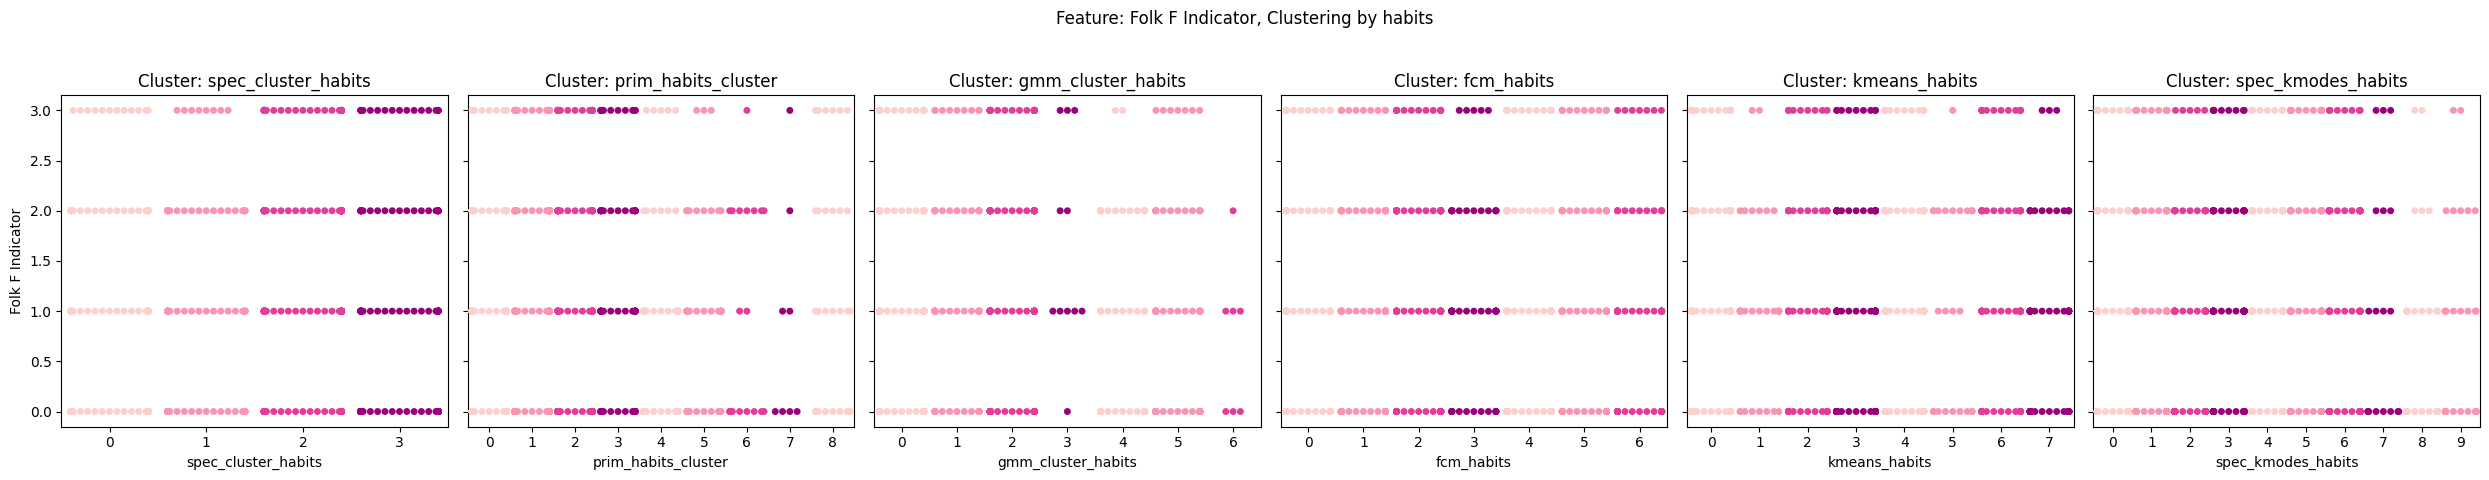

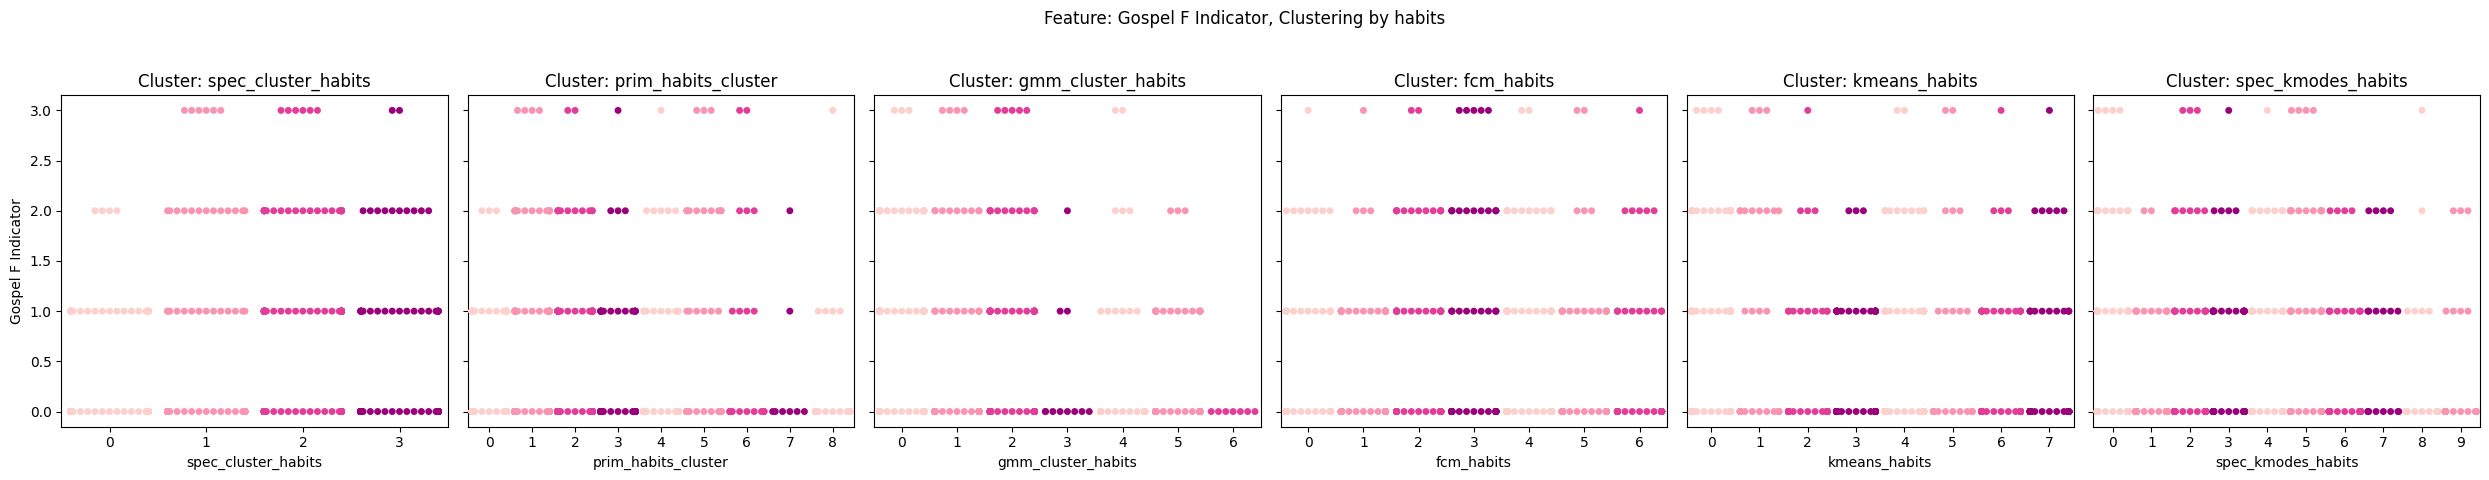

KeyboardInterrupt: 

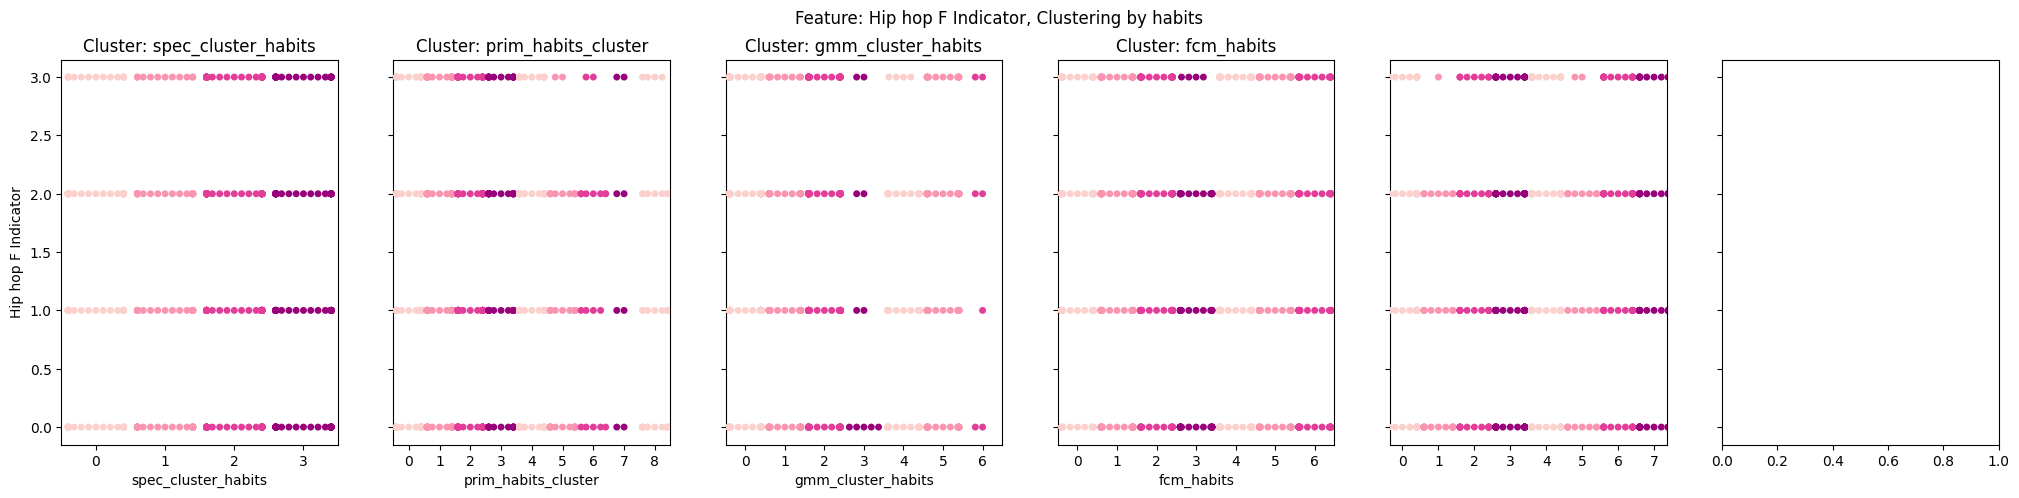

In [ ]:
# prompt: for each class group i want to make a plot of every feature according to the cluster.
pink_palette = sns.color_palette("RdPu", n_colors=len(df['spec_cluster_habits'].unique())) # Example, adjust n_colors as needed

for group_name, cluster_cols in class_groups.items():
    for feature in all_features:
        fig, axes = plt.subplots(1, len(cluster_cols), figsize=(25, 5), sharey=True)
        fig.suptitle(f'Feature: {feature}, Clustering by {group_name}')

        for i, col in enumerate(cluster_cols):
            sns.swarmplot(ax=axes[i], x=col, y=feature, data=df, size=5, palette=pink_palette,)
            axes[i].set_title(f'Cluster: {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel(feature)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
        plt.show()


###important visualization

In [ ]:
fet1 = ['Age', 'Hours per day', 'While working', 'BPM']
fet2 = ['Gospel F Indicator','K pop F Indicator', 'Latin F Indicator', 'Lofi F Indicator',]
fet3 = mental_features
intresting = [fet2, fet3]

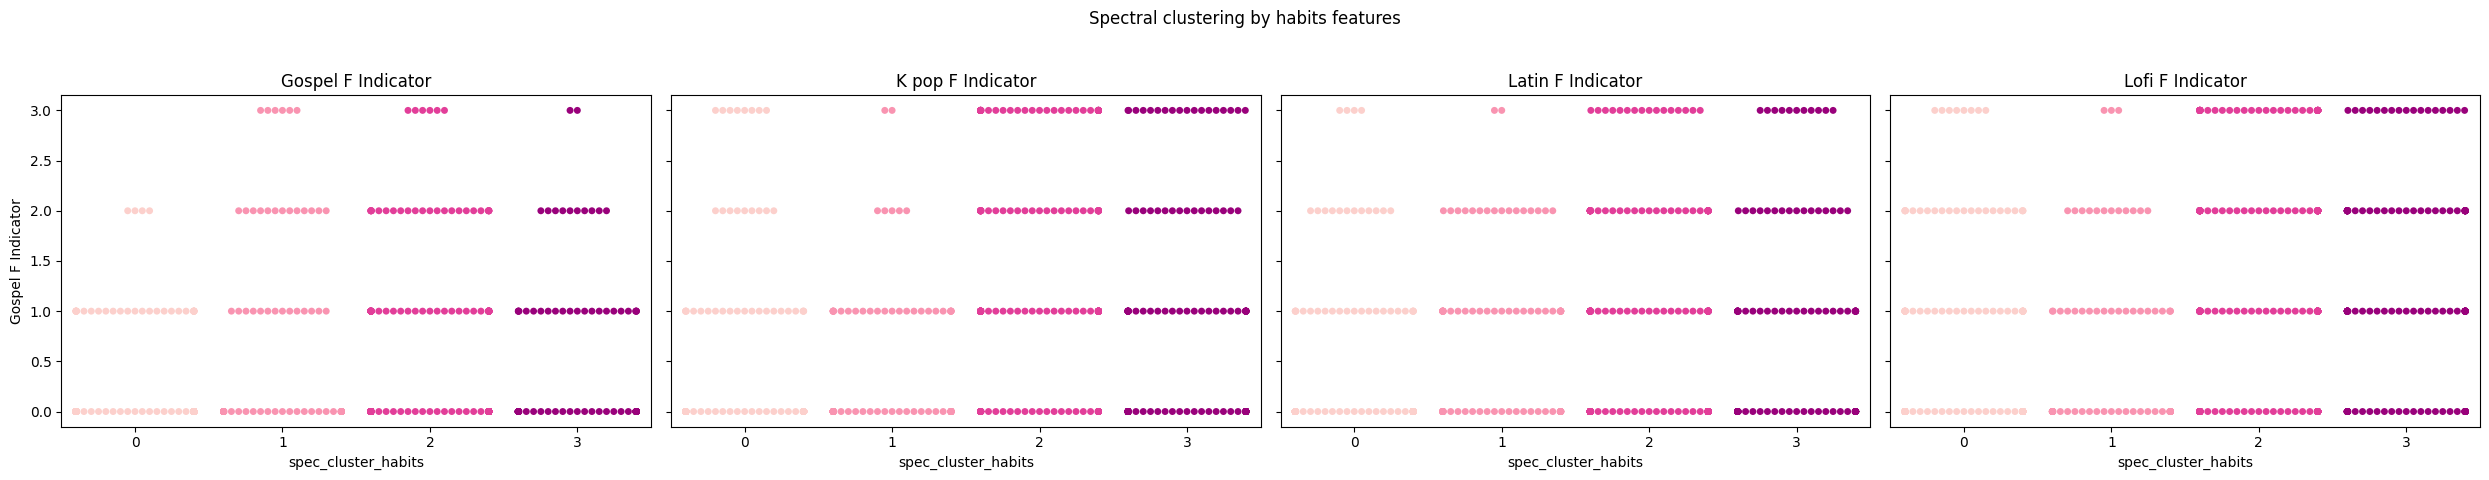

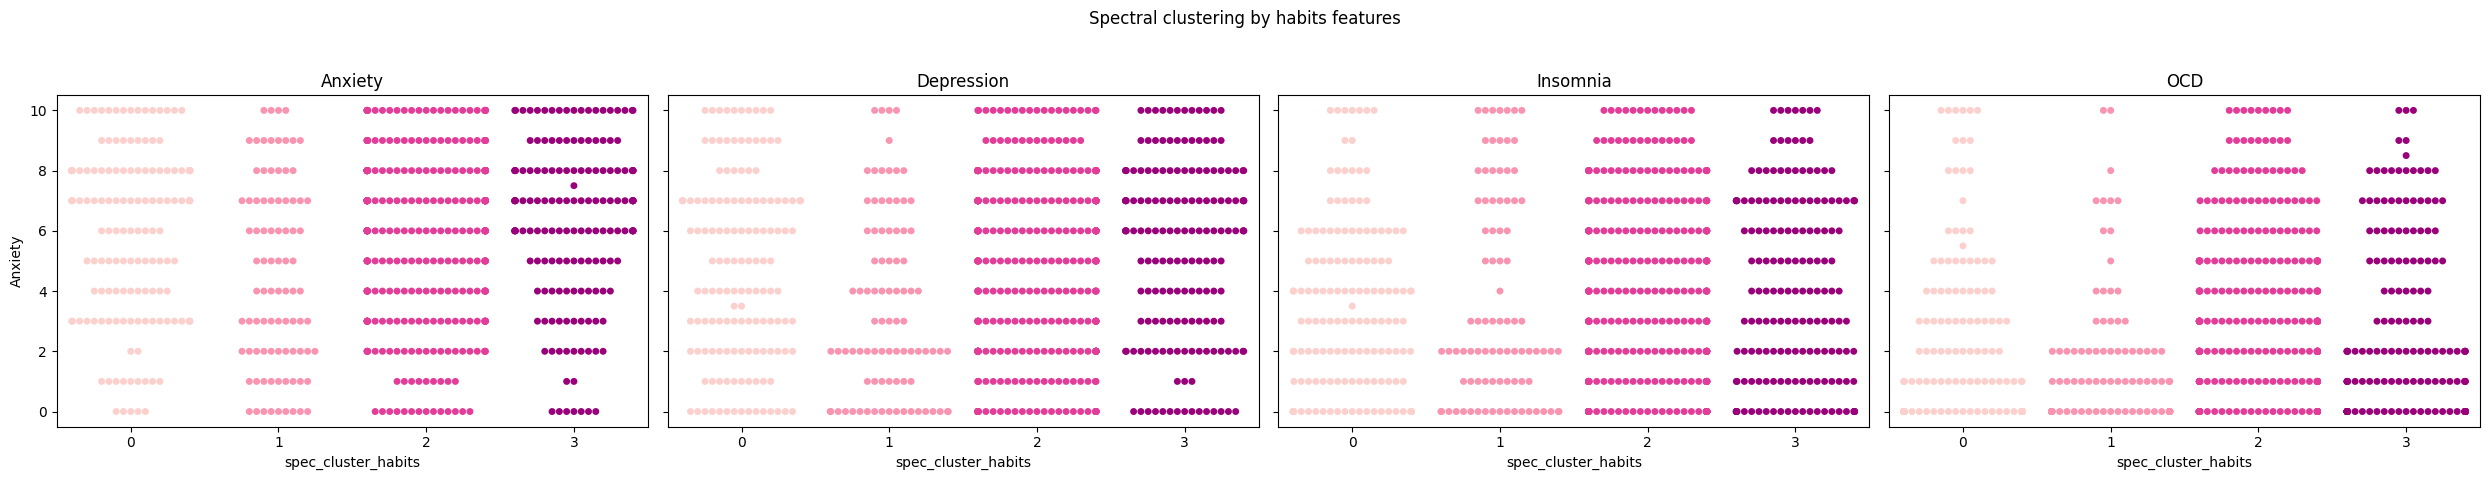

In [ ]:
for fet in intresting:
    fig, axes = plt.subplots(1, len(fet), figsize=(25, 5), sharey=True)
    fig.suptitle('Spectral clustering by habits features')

    for i,j in enumerate(fet):
        sns.swarmplot(ax=axes[i], x='spec_cluster_habits', y=j, data=df, size=5, palette=pink_palette,)
        axes[i].set_title(f'{j}')



    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

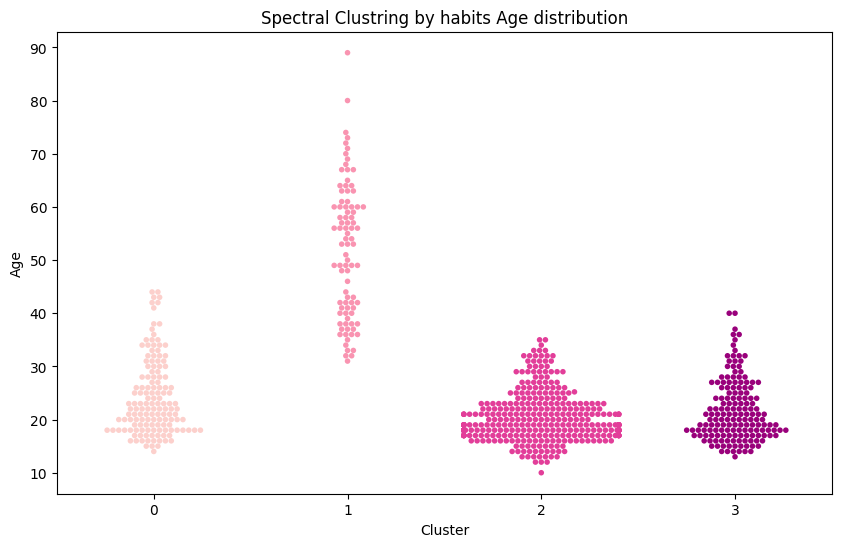

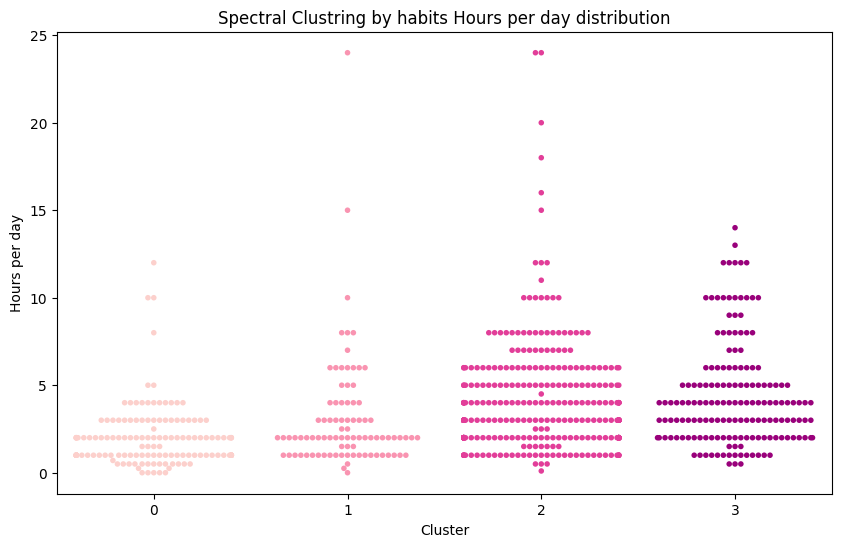

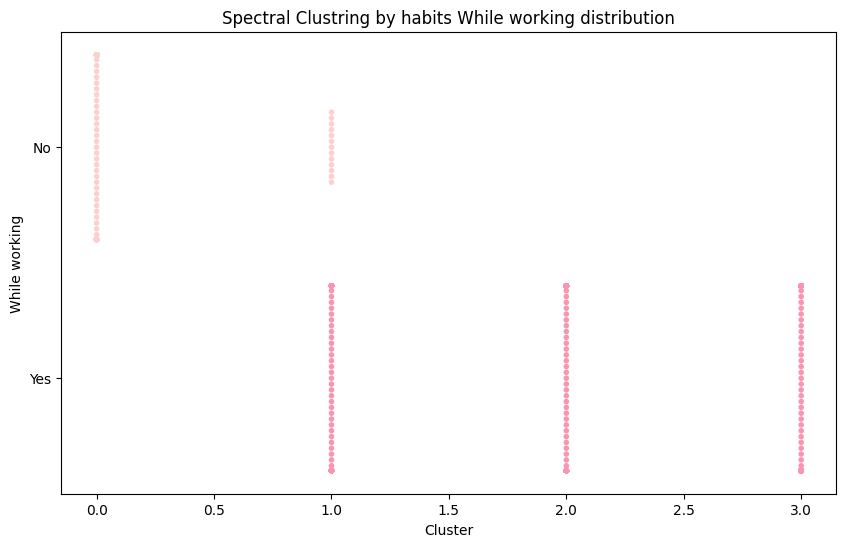

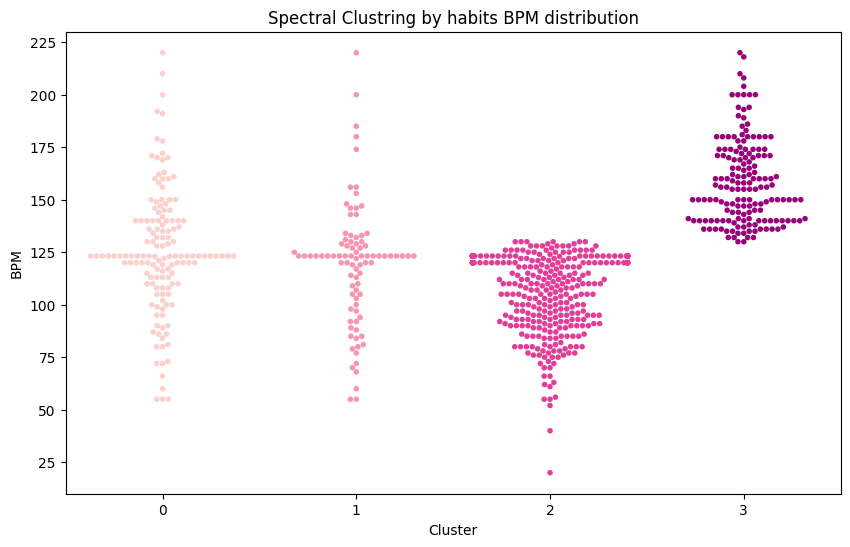

In [ ]:
for col in fet1:
    plt.figure(figsize=(10, 6))
    sns.swarmplot(x='spec_cluster_habits', y=col, data=df, size=4, palette=pink_palette)
    plt.title(f'Spectral Clustring by habits {col} distribution')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()

In [ ]:
for i in fet1:
    print(i)
    print(df.groupby('spec_cluster_habits')[i].describe())
    print()

for i in intresting:
    for j in i:
        print(j)
        print(df.groupby('spec_cluster_habits')[j].describe())
        print()

Age
                     count       mean        std   min    25%   50%   75%  \
spec_cluster_habits                                                         
0                    141.0  24.262411   7.201831  14.0  18.00  22.0  28.0   
1                     88.0  51.875000  12.703346  31.0  40.75  53.0  60.0   
2                    345.0  20.449875   4.667206  10.0  17.00  19.0  23.0   
3                    162.0  21.672840   5.754642  13.0  17.00  20.0  25.0   

                      max  
spec_cluster_habits        
0                    44.0  
1                    89.0  
2                    35.0  
3                    40.0  

Hours per day
                     count      mean       std  min  25%  50%  75%   max
spec_cluster_habits                                                     
0                    141.0  1.987234  1.789437  0.0  1.0  2.0  3.0  12.0
1                     88.0  3.105114  3.301150  0.0  1.0  2.0  4.0  24.0
2                    345.0  3.951014  3.133132  0.1  2.0  

In [ ]:
print(df)

      ID           Timestamp   Age          Primary streaming service  \
0    340   8/29/2022 8:37:30  35.0                            Spotify   
1    525     09/02/2022 9:15  28.0                            Spotify   
2    640    09/12/2022 22:26  30.0  I do not use a streaming service.   
3    430  8/30/2022 18:15:39  73.0                            Pandora   
4    568    09/04/2022 13:07  68.0                            Pandora   
..   ...                 ...   ...                                ...   
731  689   9/24/2022 0:42:39  18.0                            Spotify   
732  701    10/03/2022 10:00  20.0                      YouTube Music   
733  707    10/03/2022 15:38  23.0                            Spotify   
734  713     10/04/2022 8:53  23.0  I do not use a streaming service.   
735  718    10/05/2022 12:30  23.0                            Spotify   

     Primary streaming service Indicator  Hours per day While working  \
0                                      2          

#Visualization- Dimentions

##Algo

###SVD

In [103]:
#habits
svd = TruncatedSVD(n_components=2)  # Reduce to 2 dimensions for visualization
X_svd = svd.fit_transform(X_con_habits_scaled)
X_svd_list = [tuple(row) for row in X_svd]
df['SVD_habits'] = X_svd_list


In [104]:
#mental
svd = TruncatedSVD(n_components=2)  # Reduce to 2 dimensions for visualization
X_svd = svd.fit_transform(X_con_mental_scaled)
X_svd_list = [tuple(row) for row in X_svd]
df['SVD_mental'] = X_svd_list


In [105]:
#All
svd = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_svd = svd.fit_transform(X_con_all_scaled)
X_svd_list = [tuple(row) for row in X_svd]
df['SVD_all'] = X_svd_list

###PCA

In [106]:

# ##PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_con_habits_scaled)
X_pca_list = [tuple(row) for row in X_pca]
df['PCA_habits'] = X_pca_list

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_con_mental_scaled)
X_pca_list = [tuple(row) for row in X_pca]
df['PCA_mental'] = X_pca_list

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_con_all_scaled)
X_pca_list = [tuple(row) for row in X_pca]
df['PCA_all'] = X_pca_list


###ICA

In [107]:
ica = FastICA(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_ica = ica.fit_transform(X_con_habits_scaled)
X_ica_list = [tuple(row) for row in X_ica]
df['ICA_habits'] = X_ica_list

ica = FastICA(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_ica = ica.fit_transform(X_con_mental_scaled)
X_ica_list = [tuple(row) for row in X_ica]
df['ICA_mental'] = X_ica_list

ica = FastICA(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_ica = ica.fit_transform(X_con_all_scaled)
X_ica_list = [tuple(row) for row in X_ica]
df['ICA_all'] = X_ica_list


###MDS

In [108]:
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_con_habits_scaled)
X_mds_list = [tuple(row) for row in X_mds]
df['MDS_habits'] = X_mds_list

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_con_mental_scaled)
X_mds_list = [tuple(row) for row in X_mds]
df['MDS_mental'] = X_mds_list

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_con_all_scaled)
X_mds_list = [tuple(row) for row in X_mds]
df['MDS_all'] = X_mds_list


##Plot

In [ ]:
pink_palette = sns.color_palette("RdPu", n_colors=len(df['spec_cluster_habits'].unique())) # Example, adjust n_colors as needed

reduction_methods = ['SVD', 'PCA', 'ICA', 'MDS']
groups = ['habits', 'mental', 'all']
class_groups = {
    'habits': ['spec_cluster_habits', 'prim_habits_cluster', 'gmm_cluster_habits', 'fcm_habits', 'kmeans_habits'],
    'mental': ['spec_cluster_mental', 'prim_mental_cluster', 'gmm_cluster_mental', 'fcm_mental', 'kmeans_mental'],
    'all': ['spec_cluster_all', 'prim_all_cluster', 'gmm_cluster_all', 'fcm_all', 'kmeans_all']
}

for group in groups:
    for method in reduction_methods:
        fig, axes = plt.subplots(1, len(class_groups[group]), figsize=(25, 5))
        fig.suptitle(f'{method} Dimensionality Reduction for {group} Clusters')

        for i, col in enumerate(class_groups[group]):
            # Extract x and y coordinates from the tuple
            df['x'] = df[f'{method}_{group}'].apply(lambda x: x[0])
            df['y'] = df[f'{method}_{group}'].apply(lambda x: x[1])

            sns.scatterplot(ax=axes[i], x='x', y='y', hue=col, data=df, palette=pink_palette, s=50) # Increased point size
            axes[i].set_title(f'Cluster: {col}')
            axes[i].set_xlabel(f'{method}_x')
            axes[i].set_ylabel(f'{method}_y')

            # Clean up the x and y columns
            df.drop(['x', 'y'], axis=1, inplace=True)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
        plt.show()


##TSNE

In [ ]:
# prompt: id like to apply TSNE

import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assuming 'df' and 'features_for_clustering' are defined in your existing code
# Replace with your actual DataFrame and feature columns

# Select features for t-SNE
X_tsne = df[features_for_clustering]

# Normalize the data
scaler = StandardScaler()
X_tsne_scaled = scaler.fit_transform(X_tsne)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42) # You can adjust perplexity, early_exaggeration, and learning_rate
X_tsne_transformed = tsne.fit_transform(X_tsne_scaled)

# Create a new DataFrame for the t-SNE components
tsne_df = pd.DataFrame(data=X_tsne_transformed, columns=['t-SNE1', 't-SNE2'])

# Concatenate the t-SNE components with the original DataFrame
df = pd.concat([df, tsne_df], axis=1)

# Visualize the t-SNE results (example using a specific cluster column)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=df, hue='prim_all_cluster') # Replace 'prim_all_cluster' with your desired cluster column
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

##HMM

In [110]:
df.to_csv('data_after_all.csv')

